In [4]:
import lightning as L 
import matplotlib.pyplot as plt
import lightning as L
from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor, EarlyStopping, StochasticWeightAveraging
import torch 
import numpy as np
import pandas as pd
import h5py
from src.models.AE import AutoEncoder_01
torch.set_default_dtype(torch.float64)
torch.set_float32_matmul_precision("high")

In [10]:
params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'legend.fontsize': 18,
   'xtick.labelsize': 18,
   'ytick.labelsize': 18,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

In [11]:
NB3_path = "G:\\Codes\\jED.jl\\data_batch1_NB3_nPrune.hdf5"
device = "cpu"
with h5py.File(NB3_path, "r") as hf:
    x_NB3 = hf["Set1/GImp"][:]
x_NB3 = np.concatenate((x_NB3.real, x_NB3.imag), axis=1)
x_NB3 = torch.tensor(x_NB3, dtype=torch.float64);
x_gpu_NB3 = x_NB3.to(device)

In [12]:
df = pd.DataFrame({'int': [], 'int': [], 'float': [], 'int': [], 'int': []}, columns = ['VersionID', 'latent_dim', 'n_layers', 'NB', 'loss'])
for i in range(64):
    print(f"running model {i}")
    model = AutoEncoder_01.load_from_checkpoint("lightning_logs/AE_nPrune_02_nLayers_LatentScaling/version_{}/checkpoints/last.ckpt".format(i))
    device = "cuda"
    model.setup()
    model.to(device)
    model.eval()
    y_pred = model(x_gpu_NB3)
    loss_i = model.loss(y_pred, x_gpu_NB3).cpu().detach().item()
    df.loc[i] = {'VersionID': i, 'latent_dim': model.latent_dim, 'n_layers': model.n_layers, 'NB': 3, 'loss': loss_i}


running model 0


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
NB4_path = "G:\\Codes\\jED.jl\\data_batch1_NB4_nPrune.hdf5"
device = "cuda"
with h5py.File(NB4_path, "r") as hf:
    x_NB4 = hf["Set1/GImp"][:]
x_NB4 = np.concatenate((x_NB4.real, x_NB4.imag), axis=1)
x_NB4 = torch.tensor(x_NB4, dtype=torch.float64);
x_gpu_NB4 = x_NB4.to(device)

df = pd.DataFrame({'int': [], 'int': [], 'float': [], 'int': [], 'int': []}, columns = ['VersionID', 'latent_dim', 'n_layers', 'NB', 'loss'])
for i in range(64):
    print(f"running model {i}")
    model = AutoEncoder_01.load_from_checkpoint("lightning_logs/AE_nPrune_02_nLayers_LatentScaling/version_{}/checkpoints/last.ckpt".format(i))
    model.setup()
    model.to(device)
    model.eval()
    y_pred = model(x_gpu_NB4)
    loss_i = model.loss(y_pred, x_gpu_NB4).cpu().detach().item()
    df.loc[i] = {'VersionID': i, 'latent_dim': model.latent_dim, 'n_layers': model.n_layers, 'NB': 4, 'loss': loss_i}


running model 0
running model 1
running model 2
running model 3
running model 4
running model 5
running model 6
running model 7
running model 8
running model 9
running model 10
running model 11
running model 12
running model 13
running model 14
running model 15
running model 16
running model 17
running model 18
running model 19
running model 20
running model 21
running model 22
running model 23
running model 24
running model 25
running model 26
running model 27
running model 28
running model 29
running model 30
running model 31
running model 32
running model 33
running model 34
running model 35
running model 36
running model 37
running model 38
running model 39
running model 40
running model 41
running model 42
running model 43
running model 44
running model 45
running model 46
running model 47
running model 48
running model 49
running model 50
running model 51
running model 52
running model 53
running model 54
running model 55
running model 56
running model 57
running model 58
running

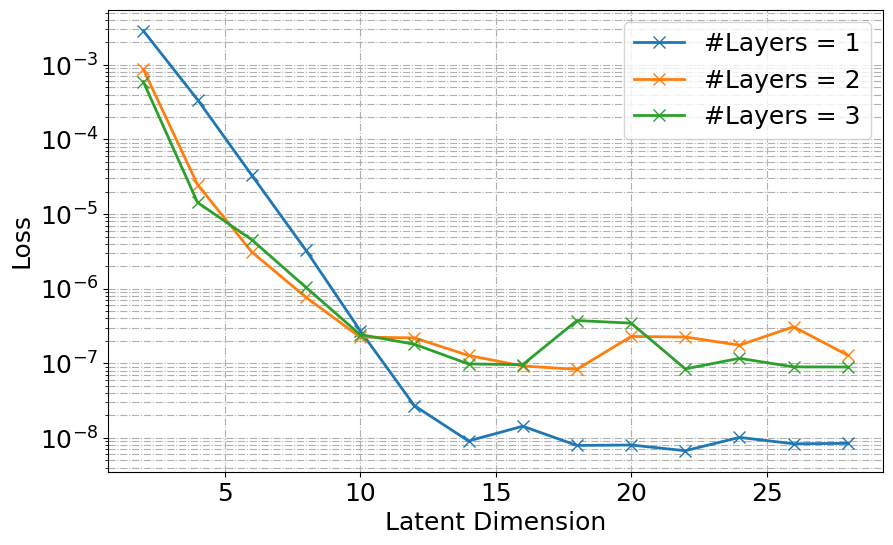

In [ ]:
t1 = df[df.n_layers == 1].sort_values(by=['latent_dim', 'loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t2 = df[df.n_layers == 2].sort_values(by=['latent_dim', 'loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t3 = df[df.n_layers == 3].sort_values(by=['latent_dim', 'loss']).drop_duplicates(subset=['latent_dim'], keep='first')

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)
ax.plot(t1.latent_dim, t1.loss, marker='x', label="#Layers = 1", linewidth=2, markersize=8)
ax.plot(t2.latent_dim, t2.loss, marker='x', label="#Layers = 2", linewidth=2, markersize=8)
ax.plot(t3.latent_dim, t3.loss, marker='x', label="#Layers = 3", linewidth=2, markersize=8)
ax.set_yscale('log')
ax.grid(axis="both", which="both", linestyle="-.")
ax.legend()
ax.set_xlabel("Latent Dimension")
ax.set_ylabel("Loss")

plt.savefig("AE_GF_loss_of_latentDim_NB4.pdf")

In [64]:
t1.drop_duplicates(subset=['latent_dim'], keep='last')

,VersionID,latent_dim,n_layers,NB,loss
42,42,2,1,3,2.806208e-03
43,43,4,1,3,2.898239e-04
44,44,6,1,3,2.292012e-05
45,45,8,1,3,1.806061e-06
46,46,10,1,3,1.207568e-07
47,47,12,1,3,8.795455e-09
48,48,14,1,3,2.633139e-09
49,49,16,1,3,4.066027e-09
50,50,18,1,3,2.234490e-09
51,51,20,1,3,2.278408e-09
